## Film Recommendation - Matrix Factorization by Xiaohui (Eartha) Guo

In [1]:
import numpy as np
import pandas as pd
import math
from numpy.linalg import inv

In [2]:
ratings_test = pd.read_csv('/Users/earthaguo/Documents/Introduction to data science/final project/film recommendation/documents for project/data/ratings_test.csv',header=None)
ratings_test.columns = ['user_id', 'movie_id', 'rating']


In [3]:
ratings = pd.read_csv('/Users/earthaguo/Documents/Introduction to data science/final project/film recommendation/data/ratings.csv',header=None)
ratings.columns = ['user_id', 'movie_id', 'rating']
ratings

,user_id,movie_id,rating
0,196,242,-0.53039
1,186,302,-0.53039
2,244,51,-1.53040
3,166,346,-2.53040
4,298,474,0.46961
5,115,265,-1.53040
6,253,465,1.46960
7,305,451,-0.53039
8,6,86,-0.53039
9,62,257,-1.53040


In [113]:
movies = [line.rstrip() for line in open('/Users/earthaguo/Documents/Introduction to data science/final project/film recommendation/data/movies.txt')]
movies


['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Twelve Monkeys (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'Richard III (1995)',
 'Seven (Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'Mighty Aphrodite (1995)',
 'Postino, Il (1994)',
 "Mr. Holland's Opus (1995)",
 'French Twist (Gazon maudit) (1995)',
 'From Dusk Till Dawn (1996)',
 'White Balloon, The (1995)',
 "Antonia's Line (1995)",
 'Angels and Insects (1995)',
 'Muppet Treasure Island (1996)',
 'Braveheart (1995)',
 'Taxi Driver (1976)',
 'Rumble in the Bronx (1995)',
 'Birdcage, The (1996)',
 'Brothers McMullen, The (1995)',
 'Bad Boys (1995)',
 'Apollo 13 (1995)',
 'Batman Forever (1995)',
 'Belle de jour (1967)',
 'Crimson Tide (1995)',
 'Crumb (1994)',
 'Desperado (1995)',
 'Doom Generation, The (1995)',
 'Free Willy 2: The Adventure Home (1995)',
 'Mad Love (1995)',
 'Nadja (1994)',
 'Net, The (1995

In [5]:
len(movies)

1682

In [6]:
movies[49]

'Star Wars (1977)'

In [7]:
# Unique value of movies for training dataset

len(np.unique(ratings['movie_id']))

1676

In [8]:
len(np.unique(ratings_test['movie_id']))

1062

In [9]:
# Test whether training and testing dataset together contain all the movies
check_whether_all_movie = pd.concat([ratings, ratings_test])
check_whether_all_movie

,user_id,movie_id,rating
0,196,242,-0.53039
1,186,302,-0.53039
2,244,51,-1.53040
3,166,346,-2.53040
4,298,474,0.46961
5,115,265,-1.53040
6,253,465,1.46960
7,305,451,-0.53039
8,6,86,-0.53039
9,62,257,-1.53040


In [10]:
len(np.unique(check_whether_all_movie['movie_id']))
# It matches the total number of movies. 



1682

In [11]:
len(np.unique(check_whether_all_movie['user_id']))
# It matches the total number of movies. 



943

In [12]:
# np.unique(check_whether_all_movie['user_id'])

In [13]:
# Start to implement the algorithm

In [14]:
# Create a function to initialize V

def initialize_V(V):
    import numpy as np
    import pandas as pd
    import math

    mean = [0,0,0,0,0,0,0,0,0,0]
    cov = [[1,0,0,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0],
       [0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],
       [0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,1,0],
       [0,0,0,0,0,0,0,0,0,1]]
    
    
    V = np.zeros((1682,10))
    V = np.matrix(V)
    
    for i in range(0,1682):
        V[i] = np.random.multivariate_normal(mean, cov, 1)
    
    return V

In [15]:
V = np.zeros((1682,10))
V = np.matrix(V)
V.shape

(1682, 10)

In [16]:
initialize_V(V)

matrix([[ 0.05916572, -1.62959801,  0.00771809, ...,  0.77624558,
          0.580832  ,  0.79821682],
        [-0.71369945,  1.65434   ,  0.82920555, ..., -0.1322399 ,
         -0.36008343,  0.53007206],
        [-2.17748152, -1.06909331, -1.70919018, ..., -0.77464244,
          0.75774279,  0.89114973],
        ..., 
        [ 1.0808806 , -0.05109738, -0.82663536, ..., -0.30679181,
          0.14741481,  0.3755067 ],
        [-1.35919361,  1.18170261,  0.55409037, ..., -1.57135709,
          1.42413957, -0.82621986],
        [-0.2831858 , -0.9300866 , -1.52155741, ...,  1.11421554,
         -0.1856208 ,  0.47158722]])

In [17]:
# initialize V for each run of the 10 runs

run_1_time_V = initialize_V(V)
run_2_time_V = initialize_V(V)
run_3_time_V = initialize_V(V)
run_4_time_V = initialize_V(V)
run_5_time_V = initialize_V(V)
run_6_time_V = initialize_V(V)
run_7_time_V = initialize_V(V)
run_8_time_V = initialize_V(V)
run_9_time_V = initialize_V(V)
run_10_time_V = initialize_V(V)

In [18]:
run_1_time_V.shape

(1682, 10)

In [19]:
#Create column name
column_name = np.unique(check_whether_all_movie['movie_id'])
#Create row name
row_name = np.unique(check_whether_all_movie['user_id'])

In [20]:
#Create empty data frame
empty = np.empty((len(row_name),len(column_name)),dtype=np.float)
empty[:] = np.nan

In [21]:
output_data = pd.DataFrame(empty)
#Insert column names
output_data.columns = column_name
    
#Insert row names
index = pd.Index(row_name)
output_data = pd.DataFrame(output_data, index=index)



In [22]:
M_train = output_data
M_train

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
M_train.loc[6,10]

nan

In [24]:
# Fill in training observations

for i in range(0,95000):
    M_train.loc[ratings.loc[i,'user_id'],ratings.loc[i,'movie_id']] = ratings.loc[i,'rating']
    



In [28]:
M_train

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.46960,-0.53039,0.46961,-0.53039,-0.53039,1.46960,0.46961,-2.53040,1.46960,-0.53039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.46961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.53040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.46961,-0.53039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,-1.53040,NaN,0.46961,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1.46960,NaN,NaN,1.46960,1.46960,1.46960,0.46961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,-0.53039,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,1.46960,0.46961,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.46961,NaN,NaN,0.46961,NaN,NaN,0.46961,NaN,0.46961,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Create M_train with 0s.


#Create column name
column_name1 = np.unique(check_whether_all_movie['movie_id'])
#Create row name
row_name1 = np.unique(check_whether_all_movie['user_id'])


#Create empty data frame
zeros = np.empty((len(row_name1),len(column_name1)),dtype=np.float)
zeros[:] = 0

output_data1 = pd.DataFrame(zeros)
#Insert column names
output_data1.columns = column_name1
    
#Insert row names
index1 = pd.Index(row_name1)
output_data1 = pd.DataFrame(output_data1, index=index1)
M_train_with_zeros = output_data1

M_train_with_zeros[np.isnan(M_train_with_zeros)] = 0

# Fill in training observations

for i in range(0,95000):
    M_train_with_zeros.loc[ratings.loc[i,'user_id'],ratings.loc[i,'movie_id']] = ratings.loc[i,'rating']
    

In [30]:
M_train_with_zeros

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.46960,-0.53039,0.46961,-0.53039,-0.53039,1.46960,0.46961,-2.53040,1.46960,-0.53039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.46961,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.53040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
5,0.46961,-0.53039,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
6,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.53040,0.00000,0.46961,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
7,0.00000,0.00000,0.00000,1.46960,0.00000,0.00000,1.46960,1.46960,1.46960,0.46961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.53039,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
9,0.00000,0.00000,0.00000,0.00000,0.00000,1.46960,0.46961,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
10,0.46961,0.00000,0.00000,0.46961,0.00000,0.00000,0.46961,0.00000,0.46961,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [31]:
######  Try new method
i_j_list = []
for i in range(0,943):
    j_list = []
    for j in range(0,1682):
        if math.isnan(M_train.loc[i+1,j+1]) is False:
            j_list.append(j)
    i_j_list.append(j_list)

In [32]:
len(i_j_list)

943

In [33]:
j_i_list = []
for j in range(0,1682):
    i_list = []
    for i in range(0,943):
        if math.isnan(M_train.loc[i+1,j+1]) is False:
            i_list.append(i)
    j_i_list.append(i_list)

In [34]:
len(j_i_list)

1682

In [35]:
# This one works
# Function to update for multiple iterations
# Add L value


def matrix_factorization(T, initial_V):
    import numpy as np
    import pandas as pd
    import math
    from numpy.linalg import inv
    
    U_list = []
    V_list = []
    L_list = []
    
    for t in range(0,T):
        if t == 0:

                
            U = np.zeros((943,10))
            U = np.matrix(U)
            I = np.identity(10)
            I = np.matrix(I)
            first_part = 0.25*I

            for i in range(0,943):
                middle = np.dot(np.transpose(initial_V[i_j_list[i]]),initial_V[i_j_list[i]])
                last_part = np.dot(np.matrix(M_train_with_zeros.loc[i+1,:]),initial_V)
                U[i] = np.dot(last_part,inv(first_part + middle))
    
   
            U_list.append(U)
            
        
        
        
            V = run_1_time_V.copy()
            for j in range(0,1682):
                
                middle = np.dot(np.transpose(U[j_i_list[j]]),U[j_i_list[j]])
                last_part = np.dot(np.matrix(M_train_with_zeros.loc[:,j+1]),U)
                V[j] = np.dot(last_part,inv(first_part + middle))
        
        
            V_list.append(V)
            
            
            # Calculate L
            
            middle = (np.linalg.norm(U)**2)*0.5
            last = (np.linalg.norm(V)**2)*0.5
            
            aa = M_train - np.dot(U,np.transpose(V))
            bb = (np.square(aa))/(0.25*2)
            first = np.nansum(bb)
            
            L = (-1)*(first + middle + last)
            L_list.append(L)
            
            
        else:
            I = np.identity(10)
            I = np.matrix(I)
            first_part = 0.25*I

            for i in range(0,943):
                middle = np.dot(np.transpose(V[i_j_list[i]]),V[i_j_list[i]])
                last_part = np.dot(np.matrix(M_train_with_zeros.loc[i+1,:]),V)
                U[i] = np.dot(last_part,inv(first_part + middle))
    
   
            U_list.append(U)
            

            for j in range(0,1682):
                
                middle = np.dot(np.transpose(U[j_i_list[j]]),U[j_i_list[j]])
                last_part = np.dot(np.matrix(M_train_with_zeros.loc[:,j+1]),U)
                V[j] = np.dot(last_part,inv(first_part + middle))
        
        
            V_list.append(V)
            
            
            # Calculate L
            
            middle = (np.linalg.norm(U)**2)*0.5
            last = (np.linalg.norm(V)**2)*0.5
            
            aa = M_train - np.dot(U,np.transpose(V))
            bb = (np.square(aa))/(0.25*2)
            first = np.nansum(bb)
            
            L = (-1)*(first + middle + last)
            L_list.append(L)
            

    
    return    U_list, V_list, L_list
    
    



In [36]:
run1 = matrix_factorization(100, run_1_time_V)
run2 = matrix_factorization(100, run_2_time_V)
run3 = matrix_factorization(100, run_3_time_V)
run4 = matrix_factorization(100, run_4_time_V)
run5 = matrix_factorization(100, run_5_time_V)
run6 = matrix_factorization(100, run_6_time_V)
run7 = matrix_factorization(100, run_7_time_V)
run8 = matrix_factorization(100, run_8_time_V)
run9 = matrix_factorization(100, run_9_time_V)
run10 = matrix_factorization(100, run_10_time_V)



In [37]:
run1_data = run1[2]
run2_data = run2[2]
run3_data = run3[2]
run4_data = run4[2]
run5_data = run5[2]
run6_data = run6[2]
run7_data = run7[2]
run8_data = run8[2]
run9_data = run9[2]
run10_data = run10[2]

In [38]:
# run1_data

In [39]:
run1_data_yes = run1_data[1:101]
run2_data_yes = run2_data[1:101]
run3_data_yes = run3_data[1:101]
run4_data_yes = run4_data[1:101]
run5_data_yes = run5_data[1:101]
run6_data_yes = run6_data[1:101]
run7_data_yes = run7_data[1:101]
run8_data_yes = run8_data[1:101]
run9_data_yes = run9_data[1:101]
run10_data_yes = run10_data[1:101]

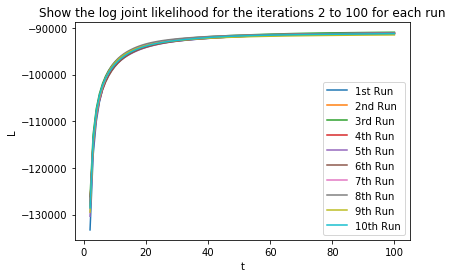

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

t = []
for i in range(2,101):
    t.append(i)
    
plot(t, run1_data_yes,label='1st Run')
plot(t, run2_data_yes,label='2nd Run') 
plot(t, run3_data_yes,label='3rd Run')
plot(t, run4_data_yes,label='4th Run')
plot(t, run5_data_yes,label='5th Run')
plot(t, run6_data_yes,label='6th Run') 
plot(t, run7_data_yes,label='7th Run')
plot(t, run8_data_yes,label='8th Run')
plot(t, run9_data_yes,label='9th Run')
plot(t, run10_data_yes,label='10th Run')


plt.title('Show the log joint likelihood for the iterations 2 to 100 for each run')
plt.xlabel('t')
plt.ylabel('L')


plt.legend()

plt.show()

In [42]:
# First Run to final run
Run1_U = run1[0][99]
Run1_U.shape

Run2_U = run2[0][99]
Run2_U.shape

Run3_U = run3[0][99]
Run3_U.shape

Run4_U = run4[0][99]
Run4_U.shape

Run5_U = run5[0][99]
Run5_U.shape

Run6_U = run6[0][99]
Run6_U.shape

Run7_U = run7[0][99]
Run7_U.shape

Run8_U = run8[0][99]
Run8_U.shape

Run9_U = run9[0][99]
Run9_U.shape

Run10_U = run10[0][99]
Run10_U.shape





(943, 10)

In [43]:
Run1_V = run1[1][99]
Run1_V.shape

Run2_V = run2[1][99]
Run2_V.shape

Run3_V = run3[1][99]
Run3_V.shape

Run4_V = run4[1][99]
Run4_V.shape

Run5_V = run5[1][99]
Run5_V.shape

Run6_V = run6[1][99]
Run6_V.shape

Run7_V = run7[1][99]
Run7_V.shape

Run8_V = run8[1][99]
Run8_V.shape

Run9_V = run9[1][99]
Run9_V.shape

Run10_V = run10[1][99]
Run10_V.shape















(1682, 10)

In [44]:
ratings_test_run1 = ratings_test.copy()
ratings_test_run1 

,user_id,movie_id,rating
0,617,590,-2.53040
1,836,12,1.46960
2,933,239,-0.53039
3,85,622,-0.53039
4,886,204,-0.53039
5,280,12,1.46960
6,311,118,-0.53039
7,886,1208,-0.53039
8,226,480,0.46961
9,405,808,-2.53040


In [45]:
ratings_test_run1['user_id'][2]

933

In [46]:
ratings_test_run1['1st_run_Obj'] = np.nan
ratings_test_run1['RMSE'] = np.nan
ratings_test_run1

,user_id,movie_id,rating,1st_run_Obj,RMSE
0,617,590,-2.53040,NaN,NaN
1,836,12,1.46960,NaN,NaN
2,933,239,-0.53039,NaN,NaN
3,85,622,-0.53039,NaN,NaN
4,886,204,-0.53039,NaN,NaN
5,280,12,1.46960,NaN,NaN
6,311,118,-0.53039,NaN,NaN
7,886,1208,-0.53039,NaN,NaN
8,226,480,0.46961,NaN,NaN
9,405,808,-2.53040,NaN,NaN


In [47]:
for i in range(0,5000):
    
    
    ratings_test_run1['1st_run_Obj'][i] = np.dot(Run1_U[ratings_test_run1['user_id'][i]-1],np.transpose(Run1_V[ratings_test_run1['movie_id'][i]-1]))   
    
    
    
    
    
    
    

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
ratings_test_run1

,user_id,movie_id,rating,1st_run_Obj,RMSE
0,617,590,-2.53040,-2.407576,NaN
1,836,12,1.46960,1.248873,NaN
2,933,239,-0.53039,-0.529544,NaN
3,85,622,-0.53039,-0.054029,NaN
4,886,204,-0.53039,0.446890,NaN
5,280,12,1.46960,-0.083090,NaN
6,311,118,-0.53039,0.192757,NaN
7,886,1208,-0.53039,0.314464,NaN
8,226,480,0.46961,-0.036520,NaN
9,405,808,-2.53040,-0.538725,NaN


In [49]:
ratings_test_run1_sorted  = ratings_test_run1.sort(['1st_run_Obj'], ascending=[False])
ratings_test_run1_sorted

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,user_id,movie_id,rating,1st_run_Obj,RMSE
744,405,1192,-2.53040,5.697173,NaN
1782,88,261,1.46960,4.940705,NaN
1696,219,347,-2.53040,4.791515,NaN
4999,418,1313,-1.53040,4.743780,NaN
4413,38,419,1.46960,4.193654,NaN
428,562,133,-1.53040,3.954414,NaN
76,405,1139,-2.53040,3.755722,NaN
2461,356,347,0.46961,3.575586,NaN
1497,777,42,1.46960,3.542792,NaN
1187,186,1277,0.46961,3.491708,NaN


In [50]:
from sklearn.metrics import mean_squared_error
real_run1 = np.array(ratings_test_run1_sorted['rating'])
prediction_run1 = np.array(ratings_test_run1_sorted['1st_run_Obj'])
RMSE_run1 = mean_squared_error(real_run1, prediction_run1)**0.5
RMSE_run1

1.1231472938969587

In [51]:
real_run1_test = np.array(ratings_test_run1['rating'])
prediction_run1_test = np.array(ratings_test_run1['1st_run_Obj'])
RMSE_run1_test = mean_squared_error(real_run1, prediction_run1)**0.5
RMSE_run1_test

1.1231472938969587

In [52]:
# Run 2 
ratings_test_run2 = ratings_test.copy()
ratings_test_run2

ratings_test_run2['2nd_run_Obj'] = np.nan


In [53]:
for i in range(0,5000):
    
    
    ratings_test_run2['2nd_run_Obj'][i] = np.dot(Run2_U[ratings_test_run2['user_id'][i]-1],np.transpose(Run2_V[ratings_test_run2['movie_id'][i]-1]))   
    
    
    

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [54]:
ratings_test_run2

,user_id,movie_id,rating,2nd_run_Obj
0,617,590,-2.53040,-4.342692
1,836,12,1.46960,1.147730
2,933,239,-0.53039,-0.389535
3,85,622,-0.53039,-0.281239
4,886,204,-0.53039,0.718283
5,280,12,1.46960,-0.117641
6,311,118,-0.53039,0.077210
7,886,1208,-0.53039,-1.856228
8,226,480,0.46961,0.218009
9,405,808,-2.53040,-0.680715


In [55]:
ratings_test_run2_sorted = ratings_test_run2.sort(['2nd_run_Obj'], ascending=[False])
ratings_test_run2_sorted

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,user_id,movie_id,rating,2nd_run_Obj
2914,405,877,-2.53040,6.027668
2036,405,585,-2.53040,5.764395
1097,777,690,0.46961,4.711595
1181,581,253,1.46960,4.281245
3695,405,663,-1.53040,4.272148
1615,223,321,-2.53040,4.073068
2492,38,413,-2.53040,3.739722
549,424,1084,1.46960,3.649812
3578,167,554,-2.53040,3.359364
4435,677,288,1.46960,3.345281


In [56]:
# Run 3
ratings_test_run3 = ratings_test.copy()
ratings_test_run3

ratings_test_run3['3rd_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run3['3rd_run_Obj'][i] = np.dot(Run3_U[ratings_test_run3['user_id'][i]-1],np.transpose(Run3_V[ratings_test_run3['movie_id'][i]-1]))   
    

    
ratings_test_run3_sorted = ratings_test_run3.sort(['3rd_run_Obj'], ascending=[False])
ratings_test_run3_sorted

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,user_id,movie_id,rating,3rd_run_Obj
76,405,1139,-2.53040,9.261885
2914,405,877,-2.53040,8.521433
1285,405,555,-2.53040,5.724207
4435,677,288,1.46960,4.792780
1497,777,42,1.46960,4.665449
1037,696,906,-0.53039,3.992911
3539,54,295,-0.53039,3.661791
882,711,1160,1.46960,3.646990
575,78,255,0.46961,3.577120
4531,575,321,-0.53039,3.484768


In [57]:
# Run 4
ratings_test_run4 = ratings_test.copy()


ratings_test_run4['4th_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run4['4th_run_Obj'][i] = np.dot(Run4_U[ratings_test_run4['user_id'][i]-1],np.transpose(Run4_V[ratings_test_run4['movie_id'][i]-1]))   
    
ratings_test_run4


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,movie_id,rating,4th_run_Obj
0,617,590,-2.53040,-2.177602
1,836,12,1.46960,0.802437
2,933,239,-0.53039,-0.967512
3,85,622,-0.53039,-0.232894
4,886,204,-0.53039,0.771677
5,280,12,1.46960,-0.221346
6,311,118,-0.53039,0.285946
7,886,1208,-0.53039,-1.778669
8,226,480,0.46961,-0.363894
9,405,808,-2.53040,-0.760016


In [58]:
# Run 5
ratings_test_run5 = ratings_test.copy()


ratings_test_run5['5th_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run5['5th_run_Obj'][i] = np.dot(Run5_U[ratings_test_run5['user_id'][i]-1],np.transpose(Run5_V[ratings_test_run5['movie_id'][i]-1]))   
    
ratings_test_run5

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,movie_id,rating,5th_run_Obj
0,617,590,-2.53040,-2.213461
1,836,12,1.46960,1.214614
2,933,239,-0.53039,-0.831984
3,85,622,-0.53039,-0.151513
4,886,204,-0.53039,0.589611
5,280,12,1.46960,0.089885
6,311,118,-0.53039,0.023333
7,886,1208,-0.53039,-0.279090
8,226,480,0.46961,-0.686564
9,405,808,-2.53040,-0.729665


In [59]:
# Run 6
ratings_test_run6 = ratings_test.copy()


ratings_test_run6['6th_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run6['6th_run_Obj'][i] = np.dot(Run6_U[ratings_test_run6['user_id'][i]-1],np.transpose(Run6_V[ratings_test_run6['movie_id'][i]-1]))   
    
ratings_test_run6

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,movie_id,rating,6th_run_Obj
0,617,590,-2.53040,-5.104396
1,836,12,1.46960,1.412977
2,933,239,-0.53039,-0.561186
3,85,622,-0.53039,0.129218
4,886,204,-0.53039,0.662037
5,280,12,1.46960,0.659646
6,311,118,-0.53039,0.106826
7,886,1208,-0.53039,-1.349546
8,226,480,0.46961,0.103270
9,405,808,-2.53040,-2.223247


In [60]:
# Run 7
ratings_test_run7 = ratings_test.copy()


ratings_test_run7['7th_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run7['7th_run_Obj'][i] = np.dot(Run7_U[ratings_test_run7['user_id'][i]-1],np.transpose(Run7_V[ratings_test_run7['movie_id'][i]-1]))   
    
ratings_test_run7

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,movie_id,rating,7th_run_Obj
0,617,590,-2.53040,-1.814937
1,836,12,1.46960,1.226872
2,933,239,-0.53039,-0.548729
3,85,622,-0.53039,0.084622
4,886,204,-0.53039,0.471738
5,280,12,1.46960,0.270048
6,311,118,-0.53039,0.172825
7,886,1208,-0.53039,-0.899583
8,226,480,0.46961,0.180115
9,405,808,-2.53040,-1.143148


In [61]:
# Run 8
ratings_test_run8 = ratings_test.copy()


ratings_test_run8['8th_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run8['8th_run_Obj'][i] = np.dot(Run8_U[ratings_test_run8['user_id'][i]-1],np.transpose(Run8_V[ratings_test_run8['movie_id'][i]-1]))   
    
ratings_test_run8

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,movie_id,rating,8th_run_Obj
0,617,590,-2.53040,-1.531448
1,836,12,1.46960,0.473652
2,933,239,-0.53039,-0.667622
3,85,622,-0.53039,-0.316676
4,886,204,-0.53039,0.837405
5,280,12,1.46960,0.520622
6,311,118,-0.53039,0.426173
7,886,1208,-0.53039,-1.167420
8,226,480,0.46961,-0.143047
9,405,808,-2.53040,-2.498070


In [62]:
# Run 9
ratings_test_run9 = ratings_test.copy()


ratings_test_run9['9th_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run9['9th_run_Obj'][i] = np.dot(Run9_U[ratings_test_run9['user_id'][i]-1],np.transpose(Run9_V[ratings_test_run9['movie_id'][i]-1]))   
    
ratings_test_run9

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,movie_id,rating,9th_run_Obj
0,617,590,-2.53040,-4.170314
1,836,12,1.46960,0.466474
2,933,239,-0.53039,-0.838717
3,85,622,-0.53039,-0.735366
4,886,204,-0.53039,0.457023
5,280,12,1.46960,0.253067
6,311,118,-0.53039,0.140852
7,886,1208,-0.53039,-1.355400
8,226,480,0.46961,0.560025
9,405,808,-2.53040,-1.131940


In [63]:
# Run 10
ratings_test_run10 = ratings_test.copy()


ratings_test_run10['10th_run_Obj'] = np.nan


for i in range(0,5000):
    
    
    ratings_test_run10['10th_run_Obj'][i] = np.dot(Run10_U[ratings_test_run10['user_id'][i]-1],np.transpose(Run10_V[ratings_test_run10['movie_id'][i]-1]))   
    
ratings_test_run10

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,user_id,movie_id,rating,10th_run_Obj
0,617,590,-2.53040,-2.043154
1,836,12,1.46960,1.514746
2,933,239,-0.53039,-0.612382
3,85,622,-0.53039,-0.118849
4,886,204,-0.53039,0.758729
5,280,12,1.46960,0.476467
6,311,118,-0.53039,0.336881
7,886,1208,-0.53039,-1.944431
8,226,480,0.46961,0.072984
9,405,808,-2.53040,0.168185


In [64]:
# Calculate RMSE
# Run 1

from sklearn.metrics import mean_squared_error
real_run1 = np.array(ratings_test_run1['rating'])
prediction_run1 = np.array(ratings_test_run1['1st_run_Obj'])
RMSE_run1 = mean_squared_error(real_run1, prediction_run1)**0.5
RMSE_run1

1.1231472938969587

In [65]:
# Run 2

real_run2 = np.array(ratings_test_run2['rating'])
prediction_run2 = np.array(ratings_test_run2['2nd_run_Obj'])
RMSE_run2 = mean_squared_error(real_run2, prediction_run2)**0.5
RMSE_run2

1.1394176623197136

In [66]:
# Run 3

real_run3 = np.array(ratings_test_run3['rating'])
prediction_run3 = np.array(ratings_test_run3['3rd_run_Obj'])
RMSE_run3 = mean_squared_error(real_run3, prediction_run3)**0.5
RMSE_run3

1.1358898003949489

In [67]:
# Run 4

real_run4 = np.array(ratings_test_run4['rating'])
prediction_run4 = np.array(ratings_test_run4['4th_run_Obj'])
RMSE_run4 = mean_squared_error(real_run4, prediction_run4)**0.5
RMSE_run4

1.0980390160204847

In [68]:
# Run 5

real_run5 = np.array(ratings_test_run5['rating'])
prediction_run5 = np.array(ratings_test_run5['5th_run_Obj'])
RMSE_run5 = mean_squared_error(real_run5, prediction_run5)**0.5
RMSE_run5

1.1499561908929019

In [69]:
# Run 6

real_run6 = np.array(ratings_test_run6['rating'])
prediction_run6 = np.array(ratings_test_run6['6th_run_Obj'])
RMSE_run6 = mean_squared_error(real_run6, prediction_run6)**0.5
RMSE_run6

1.1114872345746636

In [70]:
# Run 7

real_run7 = np.array(ratings_test_run7['rating'])
prediction_run7 = np.array(ratings_test_run7['7th_run_Obj'])
RMSE_run7 = mean_squared_error(real_run7, prediction_run7)**0.5
RMSE_run7

1.1050953595438322

In [71]:
# Run 8

real_run8 = np.array(ratings_test_run8['rating'])
prediction_run8 = np.array(ratings_test_run8['8th_run_Obj'])
RMSE_run8 = mean_squared_error(real_run8, prediction_run8)**0.5
RMSE_run8

1.1125260242838322

In [72]:
# Run 9

real_run9 = np.array(ratings_test_run9['rating'])
prediction_run9 = np.array(ratings_test_run9['9th_run_Obj'])
RMSE_run9 = mean_squared_error(real_run9, prediction_run9)**0.5
RMSE_run9

1.1154708449912902

In [73]:
# Run 10

real_run10 = np.array(ratings_test_run10['rating'])
prediction_run10 = np.array(ratings_test_run10['10th_run_Obj'])
RMSE_run10 = mean_squared_error(real_run10, prediction_run10)**0.5
RMSE_run10

1.1367477308703045

In [74]:
RMSE_Value = [RMSE_run1,RMSE_run2,RMSE_run3,RMSE_run4,RMSE_run5,
             RMSE_run6,RMSE_run7,RMSE_run8,RMSE_run9,RMSE_run10]
RMSE_Value = pd.Series(RMSE_Value)
RMSE_Value 

0    1.123147
1    1.139418
2    1.135890
3    1.098039
4    1.149956
5    1.111487
6    1.105095
7    1.112526
8    1.115471
9    1.136748
dtype: float64

In [75]:
objective_value = [run1[2][99],run2[2][99],run3[2][99],run4[2][99],run5[2][99],run6[2][99],run7[2][99],run8[2][99],
                  run9[2][99],run10[2][99]]
objective_value = pd.Series(objective_value)
objective_value 

0   -91256.867434
1   -91158.631579
2   -90926.773002
3   -91184.861056
4   -91139.434243
5   -91130.091731
6   -91122.178009
7   -91071.487002
8   -91499.521658
9   -91225.683045
dtype: float64

In [76]:
run_index = [1,2,3,4,5,6,7,8,9,10]
run_index = pd.Series(run_index)
run_index

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [77]:
table_2a = pd.concat([run_index, RMSE_Value, objective_value], axis=1)
table_2a.columns = ['Number of Run', 'RMSE', 'Value of Training Objective Function']
table_2a


,Number of Run,RMSE,Value of Training Objective Function
0,1,1.123147,-91256.867434
1,2,1.139418,-91158.631579
2,3,1.135890,-90926.773002
3,4,1.098039,-91184.861056
4,5,1.149956,-91139.434243
5,6,1.111487,-91130.091731
6,7,1.105095,-91122.178009
7,8,1.112526,-91071.487002
8,9,1.115471,-91499.521658
9,10,1.136748,-91225.683045


In [194]:
table_2a_sorted = table_2a.sort(['Value of Training Objective Function'],ascending=[False])
table_2a_sorted

table_2a_sorted_complete = table_2a_sorted.reset_index(drop=True)
table_2a_sorted_complete.index = table_2a_sorted_complete.index + 1
table_2a_sorted_complete

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Number of Run,RMSE,Value of Training Objective Function
1,3,1.135890,-90926.773002
2,8,1.112526,-91071.487002
3,7,1.105095,-91122.178009
4,6,1.111487,-91130.091731
5,5,1.149956,-91139.434243
6,2,1.139418,-91158.631579
7,4,1.098039,-91184.861056
8,10,1.136748,-91225.683045
9,1,1.123147,-91256.867434
10,9,1.115471,-91499.521658


In [79]:
table_2a1 = pd.concat([run_index, RMSE_Value, objective_value], axis=1)
table_2a1.columns = ['Number of Run', 'RMSE', 'Objective Function']
table_2a1

table_2a1_sorted = table_2a1.sort(['Objective Function'],ascending=[False])
table_2a1_sorted

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Number of Run,RMSE,Objective Function
2,3,1.135890,-90926.773002
7,8,1.112526,-91071.487002
6,7,1.105095,-91122.178009
5,6,1.111487,-91130.091731
4,5,1.149956,-91139.434243
1,2,1.139418,-91158.631579
3,4,1.098039,-91184.861056
9,10,1.136748,-91225.683045
0,1,1.123147,-91256.867434
8,9,1.115471,-91499.521658


In [80]:
Find_The_highest_objective_value  = pd.Series(objective_value, index=run_index)
Find_The_highest_objective_value = pd.DataFrame(Find_The_highest_objective_value)
Find_The_highest_objective_value.columns = ['objective value']
Find_The_highest_objective_value

,objective value
1,-91158.631579
2,-90926.773002
3,-91184.861056
4,-91139.434243
5,-91130.091731
6,-91122.178009
7,-91071.487002
8,-91499.521658
9,-91225.683045
10,NaN


In [81]:
Find_The_highest_objective_value_sorted = Find_The_highest_objective_value.sort(['objective value'], ascending=[False])
Find_The_highest_objective_value_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,objective value
2,-90926.773002
7,-91071.487002
6,-91122.178009
5,-91130.091731
4,-91139.434243
1,-91158.631579
3,-91184.861056
9,-91225.683045
8,-91499.521658
10,NaN


In [ ]:
# For my case, the 3rd run has the highest objective value


In [82]:
# 2b

M_train_2b = M_train.copy()

M_train_2b 



,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.46960,-0.53039,0.46961,-0.53039,-0.53039,1.46960,0.46961,-2.53040,1.46960,-0.53039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.46961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.53040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.46961,-0.53039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,-1.53040,NaN,0.46961,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,1.46960,NaN,NaN,1.46960,1.46960,1.46960,0.46961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,-0.53039,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,1.46960,0.46961,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.46961,NaN,NaN,0.46961,NaN,NaN,0.46961,NaN,0.46961,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
len(run3)

3

In [84]:
U_3 = run3[0][99]
V_3 = run3[1][99]
U_3.shape
V_3.shape

(1682, 10)

In [85]:
for i in range(0,943):
    for j in range(0,1682):
            if math.isnan(M_train_2b.loc[i+1,j+1]) is True:
                M_train_2b.loc[i+1,j+1] = np.dot(U_3[i],np.transpose(V_3[j]))[0,0]
                    

In [86]:
np.dot(U_3[0],np.transpose(V_3[0]))[0,0]

0.76354492564413889

In [87]:
M_train_2b

,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
1,1.469600,-0.530390,0.469610,-0.530390,-0.530390,1.469600,0.469610,-2.530400,1.469600,-0.530390,...,-0.026638,0.185098,-0.277353,-0.800282,-0.222647,-1.227727,-0.257340,-0.742536,0.0,-0.480584
2,0.469610,-0.581330,-1.022967,0.164822,-0.238451,0.372596,0.519003,1.156071,0.887184,-1.530400,...,-0.235389,0.362446,-0.263968,-0.761659,-0.149773,-0.323801,-0.067871,-0.195836,0.0,-0.264439
3,-0.373159,0.680548,-1.770917,-0.236135,0.316081,-2.181297,-0.057471,-0.969332,0.221421,-1.207183,...,0.004364,-0.051847,-0.325263,-0.938523,-0.360974,0.696809,0.146056,0.421434,0.0,-0.105789
4,1.013091,0.472977,0.179284,1.088704,0.495350,0.770245,0.810472,1.891388,1.313493,2.099668,...,-0.172915,0.387772,-0.062498,-0.180333,0.095638,0.822216,0.172342,0.497281,0.0,0.115209
5,0.469610,-0.530390,-1.723572,-0.144541,-1.569062,-1.928245,1.077168,-0.163399,0.131124,0.799993,...,0.223541,-0.142113,-0.300458,-0.866950,-0.584401,-0.273393,-0.057305,-0.165350,0.0,-0.426401
6,-0.239775,-1.295847,-2.094315,-0.538492,-1.484627,-0.892505,-1.530400,0.394842,0.469610,0.113817,...,0.067977,0.277557,-0.166858,-0.481457,-0.481250,-0.182085,-0.038166,-0.110126,0.0,-0.541842
7,0.550962,0.493946,-0.594901,1.469600,0.379781,-1.100564,1.469600,1.469600,1.469600,0.469610,...,-0.119957,0.291412,-0.404366,-1.166769,-0.088997,-0.108708,-0.022786,-0.065747,0.0,-0.091695
8,0.199580,-0.447837,0.235693,0.499598,-0.332038,1.121146,-0.530390,0.325372,1.048234,-0.673306,...,-0.305604,0.321574,-0.378661,-1.092598,-0.102864,-0.649219,-0.136081,-0.392651,0.0,-0.281871
9,1.357572,1.396993,-0.366888,0.786313,0.101286,1.469600,0.469610,0.670153,0.412004,-0.580196,...,0.030349,0.059437,-0.257047,-0.741688,-0.037586,0.248530,0.052094,0.150313,0.0,-0.114465
10,0.469610,0.474064,-0.243725,0.469610,0.681761,0.354107,0.469610,0.716995,0.469610,0.282721,...,-0.187841,0.212656,-0.194335,-0.560740,-0.034491,0.142670,0.029905,0.086288,0.0,-0.076375


In [137]:
movies

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 'Twelve Monkeys (1995)',
 'Babe (1995)',
 'Dead Man Walking (1995)',
 'Richard III (1995)',
 'Seven (Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'Mighty Aphrodite (1995)',
 'Postino, Il (1994)',
 "Mr. Holland's Opus (1995)",
 'French Twist (Gazon maudit) (1995)',
 'From Dusk Till Dawn (1996)',
 'White Balloon, The (1995)',
 "Antonia's Line (1995)",
 'Angels and Insects (1995)',
 'Muppet Treasure Island (1996)',
 'Braveheart (1995)',
 'Taxi Driver (1976)',
 'Rumble in the Bronx (1995)',
 'Birdcage, The (1996)',
 'Brothers McMullen, The (1995)',
 'Bad Boys (1995)',
 'Apollo 13 (1995)',
 'Batman Forever (1995)',
 'Belle de jour (1967)',
 'Crimson Tide (1995)',
 'Crumb (1994)',
 'Desperado (1995)',
 'Doom Generation, The (1995)',
 'Free Willy 2: The Adventure Home (1995)',
 'Mad Love (1995)',
 'Nadja (1994)',
 'Net, The (1995

In [138]:
movies.index('My Fair Lady (1964)')

484

In [139]:
movies.index('Lion King, The (1994)')

70

In [140]:
movies[70]

'Lion King, The (1994)'

In [141]:
movies.index('Sleepless in Seattle (1993)')

87

In [120]:
movies[87]

'Sleepless in Seattle (1993)'

In [125]:
movies.index('Gone with the Wind (1939)')

132

In [126]:
movies[132]

'Gone with the Wind (1939)'

In [127]:
movies.index('Godfather: Part II, The (1974)')

186

In [128]:
movies[186]

'Godfather: Part II, The (1974)'

In [129]:
movies.index('101 Dalmatians (1996)')

224

In [130]:
movies[224]

'101 Dalmatians (1996)'

In [131]:
movies.index('Bean (1997)')

337

In [132]:
movies[337]

'Bean (1997)'

In [110]:
movies[49]

'Star Wars (1977)'

In [93]:
V_3

matrix([[ 0.12118591, -0.12643828,  0.25614258, ...,  0.0682745 ,
          0.50730578,  0.28894034],
        [ 0.48658711,  0.5532197 ,  0.23512011, ..., -0.11675685,
          0.61123837,  0.30475064],
        [ 0.38166019, -0.35003712, -0.06287731, ...,  0.32234749,
         -0.43048983, -0.52291189],
        ..., 
        [ 0.31364704,  0.13735311,  0.20297923, ..., -0.0385828 ,
         -0.05188747,  0.11145687],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.15258564,  0.04555829,  0.15822542, ..., -0.08892293,
          0.11608199, -0.01444261]])

In [142]:
movies[181]

'GoodFellas (1990)'

In [134]:
star_wars = V_3[49]
My_fair_lady = V_3[484]
Goodfellas = V_3[181]
The_lion_king = V_3[70]
Sleepless_in_Seattle = V_3[87]
Gone_with_the_Wind = V_3[132]
Godfather_Part2 = V_3[186]
The_101_Dalmatians = V_3[224]
Bean = V_3[337]

In [96]:
# Calculating distance using V matrix
# Star Wars

Star_wars_neighbors = []
for i in range(0,1682):
    distance = np.linalg.norm(star_wars-V_3[i])
    Star_wars_neighbors.append(distance)
Star_wars_neighbors = pd.Series(Star_wars_neighbors)

In [143]:
movie_number = []
for i in range(1,1683):
    movie_number.append(i)
movie_number = pd.Series(movie_number)
# movie_number

In [144]:
movies = pd.Series(movies)
movies

0                                        Toy Story (1995)
1                                        GoldenEye (1995)
2                                       Four Rooms (1995)
3                                       Get Shorty (1995)
4                                          Copycat (1995)
5       Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6                                   Twelve Monkeys (1995)
7                                             Babe (1995)
8                                 Dead Man Walking (1995)
9                                      Richard III (1995)
10                                   Seven (Se7en) (1995)
11                             Usual Suspects, The (1995)
12                                Mighty Aphrodite (1995)
13                                     Postino, Il (1994)
14                              Mr. Holland's Opus (1995)
15                     French Twist (Gazon maudit) (1995)
16                             From Dusk Till Dawn (1996)
17            

In [145]:
Star_wars_df = pd.concat([movie_number, movies, Star_wars_neighbors], axis=1)
Star_wars_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with Star Wars']
Star_wars_df



,Movie Index,Moive Name,Euclidean Distance with Star Wars
0,1,Toy Story (1995),1.082022
1,2,GoldenEye (1995),1.702506
2,3,Four Rooms (1995),2.645574
3,4,Get Shorty (1995),1.361571
4,5,Copycat (1995),1.793985
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,3.452806
6,7,Twelve Monkeys (1995),1.147885
7,8,Babe (1995),1.456385
8,9,Dead Man Walking (1995),1.607044
9,10,Richard III (1995),2.176852


In [146]:

Star_wars_df_sorted = Star_wars_df.sort(['Euclidean Distance with Star Wars'],ascending=[True])
Star_wars_df_sorted

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Movie Index,Moive Name,Euclidean Distance with Star Wars
49,50,Star Wars (1977),0.000000
171,172,"Empire Strikes Back, The (1980)",0.357542
173,174,Raiders of the Lost Ark (1981),0.542915
180,181,Return of the Jedi (1983),0.618436
209,210,Indiana Jones and the Last Crusade (1989),0.837548
611,612,Lost Horizon (1937),0.870030
185,186,"Blues Brothers, The (1980)",0.874763
193,194,"Sting, The (1973)",0.875871
428,429,"Day the Earth Stood Still, The (1951)",0.881850
165,166,Manon of the Spring (Manon des sources) (1986),0.883298


In [101]:
Star_wars_df_sorted_first10 = Star_wars_df_sorted.copy()
Star_wars_df_sorted_first10.drop([49])

,Movie Index,Moive Name,Euclidean Distance with Star Wars
171,172,"Empire Strikes Back, The (1980)",0.357542
173,174,Raiders of the Lost Ark (1981),0.542915
180,181,Return of the Jedi (1983),0.618436
209,210,Indiana Jones and the Last Crusade (1989),0.837548
611,612,Lost Horizon (1937),0.870030
185,186,"Blues Brothers, The (1980)",0.874763
193,194,"Sting, The (1973)",0.875871
428,429,"Day the Earth Stood Still, The (1951)",0.881850
165,166,Manon of the Spring (Manon des sources) (1986),0.883298
172,173,"Princess Bride, The (1987)",0.885364


In [102]:
Star_wars_df_sorted_first10_complete = Star_wars_df_sorted_first10.reset_index(drop=True)
Star_wars_df_sorted_first10_complete.index = Star_wars_df_sorted_first10_complete.index + 1

In [103]:
Star_wars_df_sorted_first10_complete

,Movie Index,Moive Name,Euclidean Distance with Star Wars
1,50,Star Wars (1977),0.000000
2,172,"Empire Strikes Back, The (1980)",0.357542
3,174,Raiders of the Lost Ark (1981),0.542915
4,181,Return of the Jedi (1983),0.618436
5,210,Indiana Jones and the Last Crusade (1989),0.837548
6,612,Lost Horizon (1937),0.870030
7,186,"Blues Brothers, The (1980)",0.874763
8,194,"Sting, The (1973)",0.875871
9,429,"Day the Earth Stood Still, The (1951)",0.881850
10,166,Manon of the Spring (Manon des sources) (1986),0.883298


In [104]:
# Calculating distance using V matrix
# My fair lady

My_fair_lady_neighbors = []
for i in range(0,1682):
    distance = np.linalg.norm(My_fair_lady-V_3[i])
    My_fair_lady_neighbors.append(distance)
My_fair_lady_neighbors = pd.Series(My_fair_lady_neighbors)
# My_fair_lady_neighbors


In [105]:
My_fair_lady_df = pd.concat([movie_number, movies, My_fair_lady_neighbors], axis=1)
My_fair_lady_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with My Fair Lady']


My_fair_lady_df_sorted = My_fair_lady_df.sort(['Euclidean Distance with My Fair Lady'],ascending=[True])

My_fair_lady_df_sorted

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Movie Index,Moive Name,Euclidean Distance with My Fair Lady
484,485,My Fair Lady (1964),0.000000
418,419,Mary Poppins (1964),0.508362
142,143,"Sound of Music, The (1965)",0.629276
132,133,Gone with the Wind (1939),0.823049
98,99,Snow White and the Seven Dwarfs (1937),0.834968
702,703,Widows' Peak (1994),0.909966
415,416,Old Yeller (1957),0.912975
416,417,"Parent Trap, The (1961)",0.919896
628,629,Victor/Victoria (1982),0.980703
464,465,"Jungle Book, The (1994)",1.000961


In [106]:

My_fair_lady_df_sorted_first10 = My_fair_lady_df_sorted.copy()
My_fair_lady_df_sorted_first10.drop([484])

My_fair_lady_df_sorted_first10_complete = My_fair_lady_df_sorted_first10.reset_index(drop=True)
My_fair_lady_df_sorted_first10_complete.index = My_fair_lady_df_sorted_first10_complete.index + 1

In [107]:
My_fair_lady_df_sorted_first10_complete

,Movie Index,Moive Name,Euclidean Distance with My Fair Lady
1,485,My Fair Lady (1964),0.000000
2,419,Mary Poppins (1964),0.508362
3,143,"Sound of Music, The (1965)",0.629276
4,133,Gone with the Wind (1939),0.823049
5,99,Snow White and the Seven Dwarfs (1937),0.834968
6,703,Widows' Peak (1994),0.909966
7,416,Old Yeller (1957),0.912975
8,417,"Parent Trap, The (1961)",0.919896
9,629,Victor/Victoria (1982),0.980703
10,465,"Jungle Book, The (1994)",1.000961


In [ ]:
star_wars = V_3[49]
My_fair_lady = V_3[484]
Goodfellas = V_3[181]
The_lion_king = V_3[70]





In [169]:
# Calculating distance using V matrix
# The Lion King

The_Lion_King_neighbour = []
for i in range(0,1682):
    distance = np.linalg.norm(The_lion_king-V_3[i])
    The_Lion_King_neighbour.append(distance)
The_Lion_King_neighbour = pd.Series(The_Lion_King_neighbour)
# My_fair_lady_neighbors

The_Lion_King_df = pd.concat([movie_number, movies, The_Lion_King_neighbour], axis=1)
The_Lion_King_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with "The Lion King (1994)"']


The_Lion_King_df_sorted = The_Lion_King_df.sort(['Euclidean Distance with "The Lion King (1994)"'],ascending=[True])
The_Lion_King_df_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Movie Index,Moive Name,"Euclidean Distance with ""The Lion King (1994)"""
70,71,"Lion King, The (1994)",0.000000
94,95,Aladdin (1992),0.341041
587,588,Beauty and the Beast (1991),0.458715
0,1,Toy Story (1995),0.513229
87,88,Sleepless in Seattle (1993),0.546174
731,732,Dave (1993),0.672226
844,845,That Thing You Do! (1996),0.679255
27,28,Apollo 13 (1995),0.698691
215,216,When Harry Met Sally... (1989),0.708046
209,210,Indiana Jones and the Last Crusade (1989),0.713611


In [178]:
The_Lion_King_df_sorted_first10 = The_Lion_King_df_sorted.copy()
The_Lion_King_df_sorted_first10 = The_Lion_King_df_sorted_first10.drop([70])
The_Lion_King_df_sorted_first10_complete = The_Lion_King_df_sorted_first10.reset_index(drop=True)
The_Lion_King_df_sorted_first10_complete.index = The_Lion_King_df_sorted_first10_complete.index + 1
The_Lion_King_df_sorted_first10_complete.drop('Movie Index',1)


,Moive Name,"Euclidean Distance with ""The Lion King (1994)"""
1,Aladdin (1992),0.341041
2,Beauty and the Beast (1991),0.458715
3,Toy Story (1995),0.513229
4,Sleepless in Seattle (1993),0.546174
5,Dave (1993),0.672226
6,That Thing You Do! (1996),0.679255
7,Apollo 13 (1995),0.698691
8,When Harry Met Sally... (1989),0.708046
9,Indiana Jones and the Last Crusade (1989),0.713611
10,Back to the Future (1985),0.728628


In [ ]:
Sleepless_in_Seattle = V_3[87]

In [180]:
# Calculating distance using V matrix
# Sleepless_in_Seattle

Sleepless_in_Seattle_neighbour = []
for i in range(0,1682):
    distance = np.linalg.norm(Sleepless_in_Seattle-V_3[i])
    Sleepless_in_Seattle_neighbour.append(distance)
Sleepless_in_Seattle_neighbour = pd.Series(Sleepless_in_Seattle_neighbour)
# My_fair_lady_neighbors

Sleepless_in_Seattle_df = pd.concat([movie_number, movies, Sleepless_in_Seattle_neighbour], axis=1)
Sleepless_in_Seattle_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with "Sleepless in Seattle (1993)"']


Sleepless_in_Seattle_df_sorted = Sleepless_in_Seattle_df.sort(['Euclidean Distance with "Sleepless in Seattle (1993)"'],ascending=[True])
Sleepless_in_Seattle_df_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Movie Index,Moive Name,"Euclidean Distance with ""Sleepless in Seattle (1993)"""
87,88,Sleepless in Seattle (1993),0.000000
392,393,Mrs. Doubtfire (1993),0.433582
691,692,"American President, The (1995)",0.456897
76,77,"Firm, The (1993)",0.482652
14,15,Mr. Holland's Opus (1995),0.504514
731,732,Dave (1993),0.526407
70,71,"Lion King, The (1994)",0.546174
94,95,Aladdin (1992),0.555524
741,742,Ransom (1996),0.590753
567,568,Speed (1994),0.597748


In [181]:
Sleepless_in_Seattle_df_sorted_first10 = Sleepless_in_Seattle_df_sorted.copy()
Sleepless_in_Seattle_df_sorted_first10 = Sleepless_in_Seattle_df_sorted_first10.drop([87])
Sleepless_in_Seattle_df_sorted_first10_complete = Sleepless_in_Seattle_df_sorted_first10.reset_index(drop=True)
Sleepless_in_Seattle_df_sorted_first10_complete.index = Sleepless_in_Seattle_df_sorted_first10_complete.index + 1
Sleepless_in_Seattle_df_sorted_first10_complete.drop('Movie Index',1)

,Moive Name,"Euclidean Distance with ""Sleepless in Seattle (1993)"""
1,Mrs. Doubtfire (1993),0.433582
2,"American President, The (1995)",0.456897
3,"Firm, The (1993)",0.482652
4,Mr. Holland's Opus (1995),0.504514
5,Dave (1993),0.526407
6,"Lion King, The (1994)",0.546174
7,Aladdin (1992),0.555524
8,Ransom (1996),0.590753
9,Speed (1994),0.597748
10,That Thing You Do! (1996),0.639877


In [182]:
Gone_with_the_Wind = V_3[132]

In [183]:
# Calculating distance using V matrix
# Gone_with_the_Wind

Gone_with_the_Wind_neighbour = []
for i in range(0,1682):
    distance = np.linalg.norm(Gone_with_the_Wind-V_3[i])
    Gone_with_the_Wind_neighbour.append(distance)
Gone_with_the_Wind_neighbour = pd.Series(Gone_with_the_Wind_neighbour)
# My_fair_lady_neighbors

Gone_with_the_Wind_df = pd.concat([movie_number, movies, Gone_with_the_Wind_neighbour], axis=1)
Gone_with_the_Wind_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with "Gone with the Wind (1939)"']


Gone_with_the_Wind_df_sorted = Gone_with_the_Wind_df.sort(['Euclidean Distance with "Gone with the Wind (1939)"'],ascending=[True])
Gone_with_the_Wind_df_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Movie Index,Moive Name,"Euclidean Distance with ""Gone with the Wind (1939)"""
132,133,Gone with the Wind (1939),0.000000
418,419,Mary Poppins (1964),0.596637
135,136,Mr. Smith Goes to Washington (1939),0.638874
495,496,It's a Wonderful Life (1946),0.675656
632,633,"Christmas Carol, A (1938)",0.743172
98,99,Snow White and the Seven Dwarfs (1937),0.749223
658,659,Arsenic and Old Lace (1944),0.753570
415,416,Old Yeller (1957),0.763035
377,378,Miracle on 34th Street (1994),0.782993
131,132,"Wizard of Oz, The (1939)",0.783382


In [184]:
Gone_with_the_Wind_df_sorted_first10 = Gone_with_the_Wind_df_sorted.copy()
Gone_with_the_Wind_df_sorted_first10 = Gone_with_the_Wind_df_sorted_first10.drop([132])
Gone_with_the_Wind_df_sorted_first10_complete = Gone_with_the_Wind_df_sorted_first10.reset_index(drop=True)
Gone_with_the_Wind_df_sorted_first10_complete.index = Gone_with_the_Wind_df_sorted_first10_complete.index + 1
Gone_with_the_Wind_df_sorted_first10_complete.drop('Movie Index',1)

,Moive Name,"Euclidean Distance with ""Gone with the Wind (1939)"""
1,Mary Poppins (1964),0.596637
2,Mr. Smith Goes to Washington (1939),0.638874
3,It's a Wonderful Life (1946),0.675656
4,"Christmas Carol, A (1938)",0.743172
5,Snow White and the Seven Dwarfs (1937),0.749223
6,Arsenic and Old Lace (1944),0.753570
7,Old Yeller (1957),0.763035
8,Miracle on 34th Street (1994),0.782993
9,"Wizard of Oz, The (1939)",0.783382
10,"African Queen, The (1951)",0.795397


In [185]:
Godfather_Part2 = V_3[186]

In [188]:
# Calculating distance using V matrix
# Godfather_Part2

Godfather_Part2_neighbour = []
for i in range(0,1682):
    distance = np.linalg.norm(Godfather_Part2-V_3[i])
    Godfather_Part2_neighbour.append(distance)
Godfather_Part2_neighbour = pd.Series(Godfather_Part2_neighbour)
# My_fair_lady_neighbors

Godfather_Part2_df = pd.concat([movie_number, movies, Godfather_Part2_neighbour], axis=1)
Godfather_Part2_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with "Godfather: Part II, The (1974)"']


Godfather_Part2_df_sorted = Godfather_Part2_df.sort(['Euclidean Distance with "Godfather: Part II, The (1974)"'],ascending=[True])
Godfather_Part2_df_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Movie Index,Moive Name,"Euclidean Distance with ""Godfather: Part II, The (1974)"""
186,187,"Godfather: Part II, The (1974)",0.000000
126,127,"Godfather, The (1972)",0.352685
522,523,Cool Hand Luke (1967),0.628378
204,205,Patton (1970),0.643152
510,511,Lawrence of Arabia (1962),0.743002
181,182,GoodFellas (1990),0.758400
202,203,Unforgiven (1992),0.762347
22,23,Taxi Driver (1976),0.806701
134,135,2001: A Space Odyssey (1968),0.818078
653,654,Chinatown (1974),0.839072


In [189]:
Godfather_Part2_df_sorted_first10 = Godfather_Part2_df_sorted.copy()
Godfather_Part2_df_sorted_first10 = Godfather_Part2_df_sorted_first10.drop([186])
Godfather_Part2_df_sorted_first10_complete = Godfather_Part2_df_sorted_first10.reset_index(drop=True)
Godfather_Part2_df_sorted_first10_complete.index = Godfather_Part2_df_sorted_first10_complete.index + 1
Godfather_Part2_df_sorted_first10_complete.drop('Movie Index',1)

,Moive Name,"Euclidean Distance with ""Godfather: Part II, The (1974)"""
1,"Godfather, The (1972)",0.352685
2,Cool Hand Luke (1967),0.628378
3,Patton (1970),0.643152
4,Lawrence of Arabia (1962),0.743002
5,GoodFellas (1990),0.758400
6,Unforgiven (1992),0.762347
7,Taxi Driver (1976),0.806701
8,2001: A Space Odyssey (1968),0.818078
9,Chinatown (1974),0.839072
10,Apocalypse Now (1979),0.849496


In [ ]:
The_101_Dalmatians = V_3[224]

In [190]:
# Calculating distance using V matrix
# The_101_Dalmatians

The_101_Dalmatians_neighbour = []
for i in range(0,1682):
    distance = np.linalg.norm(The_101_Dalmatians-V_3[i])
    The_101_Dalmatians_neighbour.append(distance)
The_101_Dalmatians_neighbour = pd.Series(The_101_Dalmatians_neighbour)
# My_fair_lady_neighbors

The_101_Dalmatians_df = pd.concat([movie_number, movies, The_101_Dalmatians_neighbour], axis=1)
The_101_Dalmatians_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with "101 Dalmatians (1996)"']


The_101_Dalmatians_df_sorted = The_101_Dalmatians_df.sort(['Euclidean Distance with "101 Dalmatians (1996)"'],ascending=[True])
The_101_Dalmatians_df_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Movie Index,Moive Name,"Euclidean Distance with ""101 Dalmatians (1996)"""
224,225,101 Dalmatians (1996),0.000000
1475,1476,Raw Deal (1948),0.558573
1476,1477,Nightwatch (1997),0.585806
321,322,Murder at 1600 (1997),0.654093
1030,1031,Lassie (1994),0.659407
37,38,"Net, The (1995)",0.678053
1034,1035,Cool Runnings (1993),0.706349
1671,1672,Kika (1993),0.725907
755,756,Father of the Bride Part II (1995),0.740802
230,231,Batman Returns (1992),0.742844


In [191]:
The_101_Dalmatians_df_sorted_first10 = The_101_Dalmatians_df_sorted.copy()
The_101_Dalmatians_df_sorted_first10 = The_101_Dalmatians_df_sorted_first10.drop([224])
The_101_Dalmatians_df_sorted_first10_complete = The_101_Dalmatians_df_sorted_first10.reset_index(drop=True)
The_101_Dalmatians_df_sorted_first10_complete.index = The_101_Dalmatians_df_sorted_first10_complete.index + 1
The_101_Dalmatians_df_sorted_first10_complete.drop('Movie Index',1)

,Moive Name,"Euclidean Distance with ""101 Dalmatians (1996)"""
1,Raw Deal (1948),0.558573
2,Nightwatch (1997),0.585806
3,Murder at 1600 (1997),0.654093
4,Lassie (1994),0.659407
5,"Net, The (1995)",0.678053
6,Cool Runnings (1993),0.706349
7,Kika (1993),0.725907
8,Father of the Bride Part II (1995),0.740802
9,Batman Returns (1992),0.742844
10,"Favor, The (1994)",0.754165


In [ ]:

Bean = V_3[337]

In [192]:
# Calculating distance using V matrix
# Bean

Bean_neighbour = []
for i in range(0,1682):
    distance = np.linalg.norm(Bean-V_3[i])
    Bean_neighbour.append(distance)
Bean_neighbour = pd.Series(Bean_neighbour)
# My_fair_lady_neighbors

Bean_df = pd.concat([movie_number, movies, Bean_neighbour], axis=1)
Bean_df.columns = ['Movie Index','Moive Name', 'Euclidean Distance with "Bean (1997)"']


Bean_df_sorted = Bean_df.sort(['Euclidean Distance with "Bean (1997)"'],ascending=[True])
Bean_df_sorted 

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Movie Index,Moive Name,"Euclidean Distance with ""Bean (1997)"""
337,338,Bean (1997),0.000000
42,43,Disclosure (1994),1.423766
251,252,"Lost World: Jurassic Park, The (1997)",1.650735
228,229,Star Trek III: The Search for Spock (1984),1.690907
1482,1483,"Man in the Iron Mask, The (1998)",1.694907
1045,1046,Malice (1993),1.748782
501,502,Bananas (1971),1.775444
1231,1232,Madonna: Truth or Dare (1991),1.781742
1418,1419,Highlander III: The Sorcerer (1994),1.793188
830,831,Escape from L.A. (1996),1.812162


In [193]:
Bean_df_sorted_first10 = Bean_df_sorted.copy()
Bean_df_sorted_first10 = Bean_df_sorted_first10.drop([337])
Bean_df_sorted_first10_complete = Bean_df_sorted_first10.reset_index(drop=True)
Bean_df_sorted_first10_complete.index = Bean_df_sorted_first10_complete.index + 1
Bean_df_sorted_first10_complete.drop('Movie Index',1)

,Moive Name,"Euclidean Distance with ""Bean (1997)"""
1,Disclosure (1994),1.423766
2,"Lost World: Jurassic Park, The (1997)",1.650735
3,Star Trek III: The Search for Spock (1984),1.690907
4,"Man in the Iron Mask, The (1998)",1.694907
5,Malice (1993),1.748782
6,Bananas (1971),1.775444
7,Madonna: Truth or Dare (1991),1.781742
8,Highlander III: The Sorcerer (1994),1.793188
9,Escape from L.A. (1996),1.812162
10,That Darn Cat! (1965),1.824453
